# Twitter Sentiment Analysis

 ## Import libraries which are necessary

In [1]:
import re
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report

## Read and Load the Dataset

In [2]:
#importing the dataset
Dataset_Columns=['target', 'ids', 'date', 'flag', 'user', 'text']
Dataset_Encoding="ISO-8859-1"

df=pd.read_csv("G:\\Arun\\DS23\\DS\\project4\\twitter.csv", encoding=Dataset_Encoding, names=Dataset_Columns)
df.sample(5)

,target,ids,date,flag,user,text
154708,0,1933232592,Tue May 26 23:20:49 PDT 2009,NO_QUERY,knockthreetimes,I miss my brother and my sister
1301654,4,2007744971,Tue Jun 02 13:05:23 PDT 2009,NO_QUERY,RossCode,@danwoolston Make sure you also check for any ...
340253,0,2014807232,Wed Jun 03 02:45:09 PDT 2009,NO_QUERY,johnblackmore,just crossed off a few things on the white-boa...
386177,0,2053743325,Sat Jun 06 05:33:57 PDT 2009,NO_QUERY,EmClosk,Getting ready for graduation
913631,4,1752672045,Sat May 09 22:36:24 PDT 2009,NO_QUERY,StunnyBaybe,its mothers day


## Exploratory Data Analysis 

In [3]:
# check five top & bottom records of data
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.tail()

,target,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [5]:
# columns/features in data
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [6]:
# length of the dataset
print("length of data is", len(df))

length of data is 1600000


In [7]:
# shape of data
df.shape

(1600000, 6)

In [8]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
# data types of all columns
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [10]:
# checking for null values
np.sum(df.isnull().any(axis=1))

0

In [11]:
# Rows & Columns in data set
print("No of Columns in the data is:", len(df.columns))
print("No of Rows in the data is:", len(df))

No of Columns in the data is: 6
No of Rows in the data is: 1600000


In [12]:
# check unique target values
df['target'].unique()

array([0, 4], dtype=int64)

In [13]:
# check the no. of target values
df['target'].nunique()

2

##  Data Visualization of Target Variables

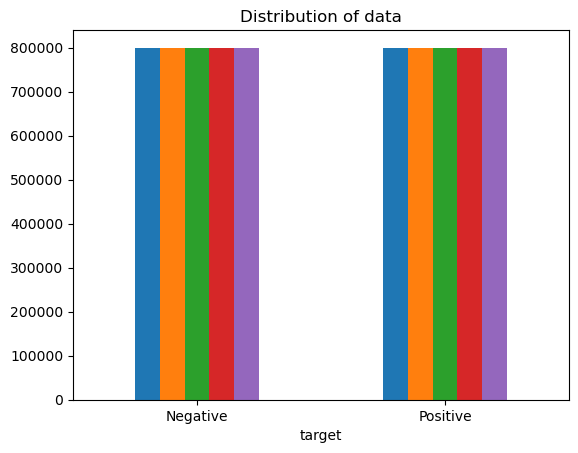

In [14]:
# plotting the distribution for dataset
ax=df.groupby('target').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative', 'Positive'],rotation=0)

# storing data in lists
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

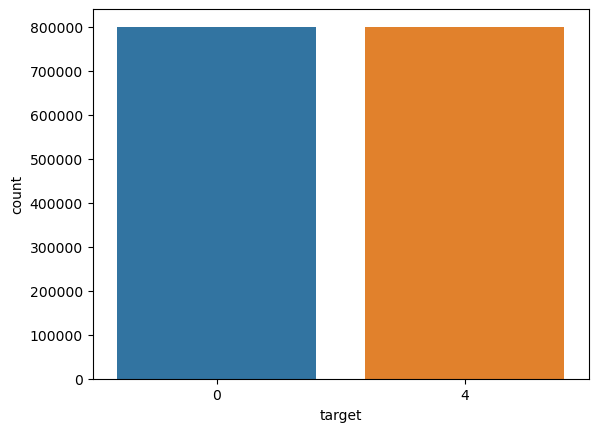

In [15]:
# using seaborn
sns.countplot(x='target', data=df)

## Data Preprocessing 

In [16]:
# Selecting the text and target column for further analysis
data=df[['text', 'target']]

In [17]:
# Replacing the values to ease understanding
# Assigning 1 to positive sentiment from 4
data['target']=data['target'].replace(4,1)

C:\Users\SONY\AppData\Local\Temp\ipykernel_10864\2864328044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']=data['target'].replace(4,1)


In [18]:
# Printing unique value of target variables
data['target'].unique()

array([0, 1], dtype=int64)

In [19]:
# Separating positive and negative tweets
data_pos=data[data['target'] == 1]
data_neg=data[data['target'] == 0]

In [20]:
# Taking 1/4th of the data so we can run it on our machine easily
data_pos=data_pos.iloc[:int(20000)]
data_neg=data_neg.iloc[:int(20000)]

In [21]:
# Combining positive and negative tweets
dataset=pd.concat([data_pos, data_neg])

In [22]:
# Making statement in lowercase
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [23]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [24]:
# Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [25]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [26]:
# Separating input feature and label
X=data.text
y=data.target

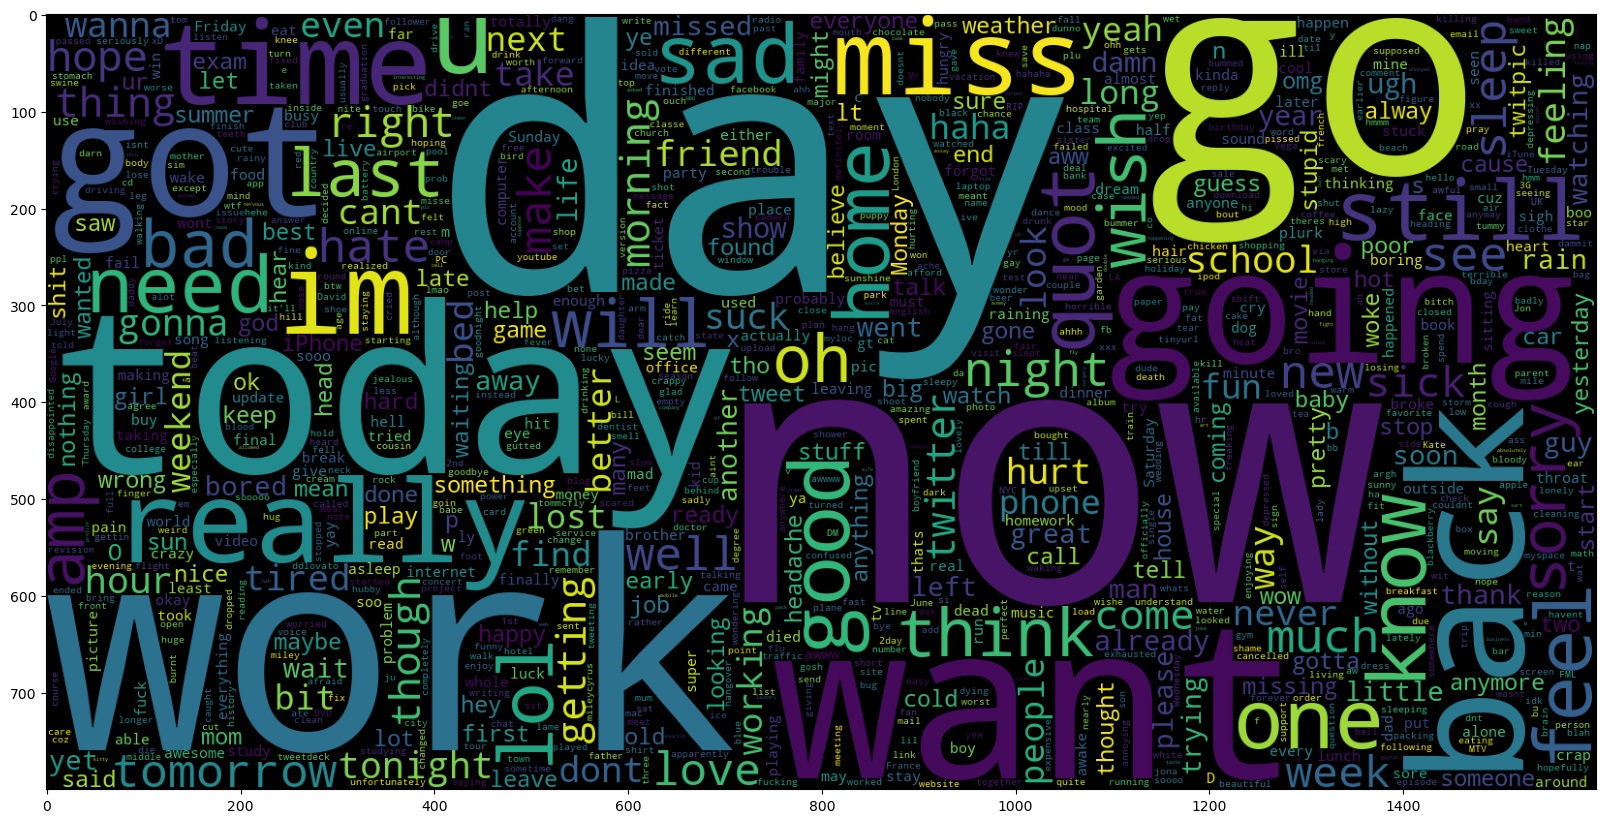

In [27]:
# Word cloud for Negative word
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
Negative_WC = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(Negative_WC)

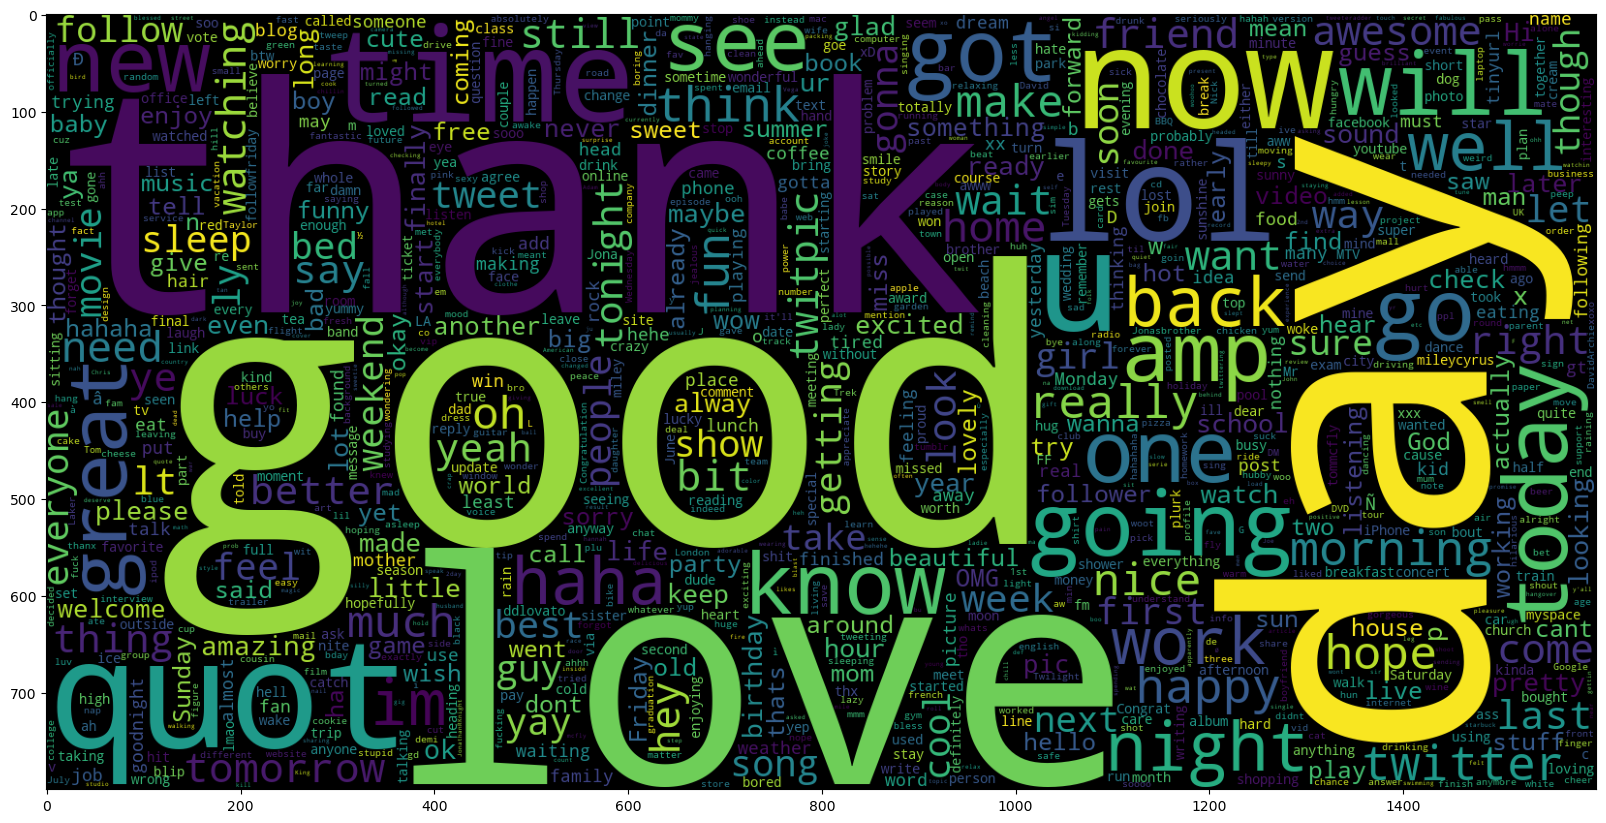

In [28]:
# Word cloud for Positive word
data_pos = data['text'][800000:]
Positive_WC = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(Positive_WC)

## Splitting the data into train and test 

In [30]:
# Separating the 95% data for training and 5% for testing data
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.05, random_state=0)

## Feature Extraction 

## Transforming the dataset using TF-IDF Vectorizer


In [31]:
# Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [32]:
# Transform the data using TF-IDF Vectorizer
X_train=vectoriser.transform(X_train)
X_test=vectoriser.transform(X_test)

## Function for Model Evaluation 

In [33]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Model Building 

## Naive Bayes   model -1

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



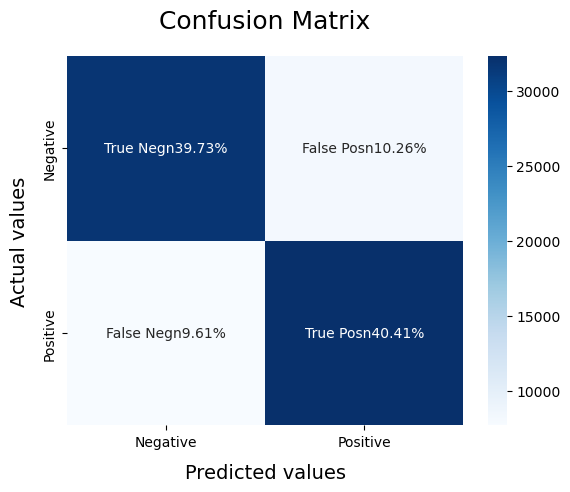

In [35]:
# Model-1 Naive_Bayes - Bernoulli
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

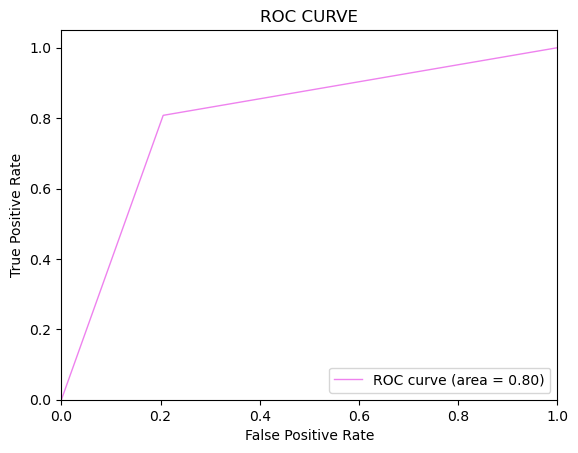

In [36]:
# Plot ROC-AUC Curve for Naive Bayes
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='violet', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Support Vector Classifier  Model-2

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     39989
           1       0.81      0.82      0.82     40011

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



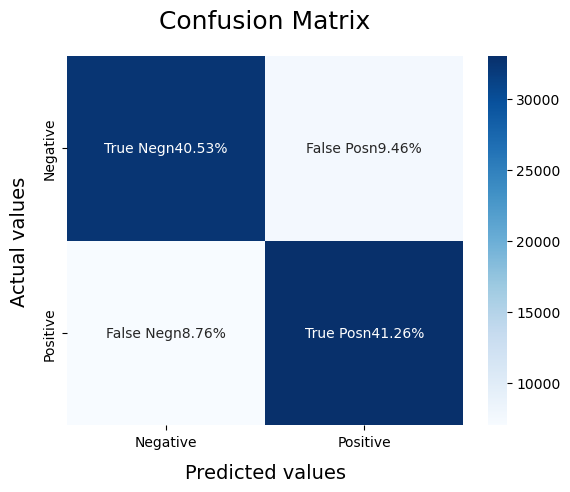

In [37]:
# Model-2 SVC 
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

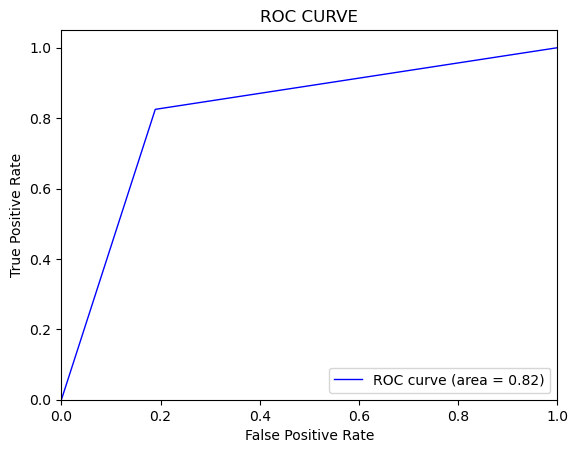

In [38]:
# Plot ROC-AUC Curve for SVC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression  Model-3

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



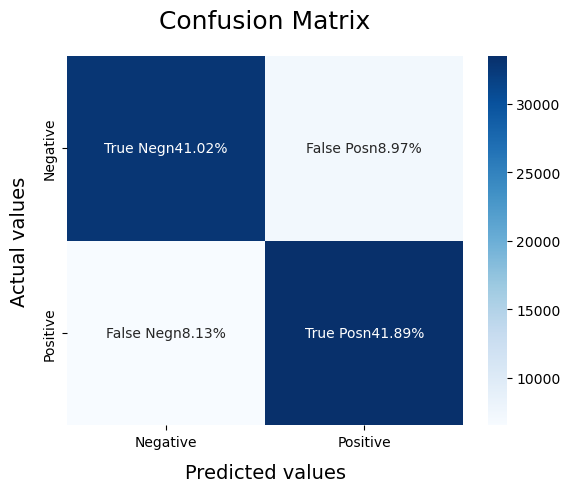

In [39]:
# Model-3 Logistic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

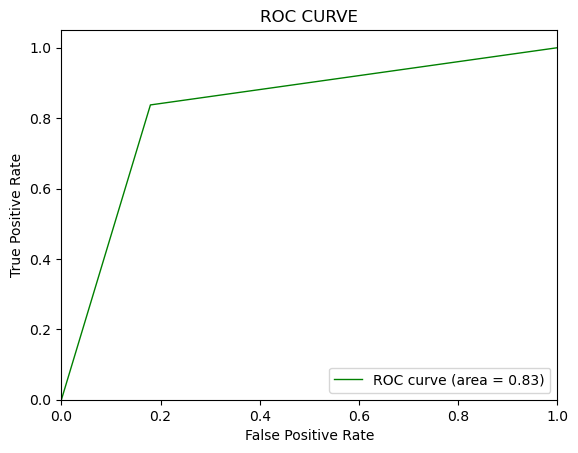

In [40]:
#Plot the ROC-AUC Curve for LR
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Saving and Train the model

In [41]:
# saving the model using joblib
from joblib import dump
dump(vectoriser,'vectoriser_train.joblib')
dump(BNBmodel,'Naive_bayes_model1.joblib')
dump(SVCmodel,'SVC_model2.joblib')
dump(LRmodel,'LR_model3.joblib')

['LR_model3.joblib']

In [89]:
# Train the model
from joblib import load

def load_models():
    #load the vectoriser
    vectoriser=load('vectoriser_train.joblib')
    BNBmodel=load('Naive_bayes_model1.joblib')
    SVCmodel=load('SVC_model2.joblib')
    LRmodel=load('LR_model3.joblib')
    return vectoriser,BNBmodel,SVCmodel,LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment
    data = [(t, s) for t, s in zip(text, sentiment)]
    
    # Convert the list into a Pandas DataFrame
    df = pd.DataFrame(data, columns=['text', 'sentiment'])
    df['sentiment'] = df['sentiment'].replace([0, 1], ['Negative', 'Positive'])  # Replace sentiment labels
    return df

    
if __name__=="__main__":
    
    # Loading the models and vectorizer
    vectoriser,BNBmodel,SVCmodel,LRmodel=load_models()
    
    # Text to classify should be in a list
    text = ["I hate twitter",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]
    
     # Predict using Bernoulli Naive Bayes model
    df_bnb = predict(vectoriser, BNBmodel, text)
    print("Bernoulli Naive Bayes Model:")
    print(df_bnb)

    # Predict using Support Vector Classifier model
    df_svc = predict(vectoriser, SVCmodel, text)
    print("\nSupport Vector Classifier Model:")
    print(df_svc)

    # Predict using Logistic Regression model
    df_lr = predict(vectoriser, LRmodel, text)
    print("\nLogistic Regression Model:")
    print(df_lr)

Bernoulli Naive Bayes Model:
                              text sentiment
0                   I hate twitter  Negative
1       May the Force be with you.  Positive
2  Mr. Stark, I don't feel so good  Negative

Support Vector Classifier Model:
                              text sentiment
0                   I hate twitter  Negative
1       May the Force be with you.  Positive
2  Mr. Stark, I don't feel so good  Negative

Logistic Regression Model:
                              text sentiment
0                   I hate twitter  Negative
1       May the Force be with you.  Positive
2  Mr. Stark, I don't feel so good  Negative
